In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read and clean data

In [2]:
df = pd.read_csv('../../../Data/Real Estate/Real Estate Data.csv', index_col=0, header=0)
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      1404 non-null   object 
 1   Zoning Class              1404 non-null   object 
 2   Lot Frontage              1151 non-null   float64
 3   Lot Area                  1404 non-null   int64  
 4   Alley                     84 non-null     object 
 5   Lot Shape                 1404 non-null   object 
 6   Land Contour              1404 non-null   object 
 7   Lot Config                1404 non-null   object 
 8   Land Slope                1404 non-null   object 
 9   Nbhd                      1404 non-null   object 
 10  Location Condition        1404 non-null   object 
 11  Bldg Type                 1404 non-null   object 
 12  House Style               1404 non-null   object 
 13  OvQual                    1404 non-null   int64  
 14  Overall 

,Type,Zoning Class,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,OvQual,Overall Cond,Built,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Basement Finished Area,Basement Unfinished Area,Basement Area,Heating Qual,CentralAir,Electrical,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Garage Yr Built,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price
0,2-STORY 1946 & NEWER,Resid Low Density,65.0,8450,NaN,Regular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2003,2003,Gable,Composite Shingle,Vinyl Siding,Brick Face,196.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,No Exposure,Good Living Quarters,706,150,856,Excellent,Y,Standard Circuit Breakers & Romex,856,854,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,No Fireplace,Attached to home,2003.0,Rough Finished,2,548,Average,Average,Paved,0,61,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,208500
1,1-STORY 1946 & NEWER,Resid Low Density,80.0,9600,NaN,Regular,Level,Frontage on 2 sides,Gentle,Veenker,Adjacent Feeder St,1-family Detached,1 story,6,8,1976,1976,Gable,Composite Shingle,Metal Siding,NaN,0.0,Average,Average,Cinder Block,"Good (90-99"")",Average,Good Exposure,Avg Living Quarters,978,284,1262,Excellent,Y,Standard Circuit Breakers & Romex,1262,0,1262,0,1,2,0,3,1,Average,6,Typical Functionality,1,Average,Attached to home,1976.0,Rough Finished,2,460,Average,Average,Paved,298,0,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,181500
2,2-STORY 1946 & NEWER,Resid Low Density,68.0,11250,NaN,Slightly irregular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2001,2002,Gable,Composite Shingle,Vinyl Siding,Brick Face,162.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Min Exposure,Good Living Quarters,486,434,920,Excellent,Y,Standard Circuit Breakers & Romex,920,866,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Average,Attached to home,2001.0,Rough Finished,2,608,Average,Average,Paved,0,42,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,223500
3,2-STORY 1945 & OLDER,Resid Low Density,60.0,9550,NaN,Slightly irregular,Level,Corner lot,Gentle,Crawford,Normal,1-family Detached,2 story,7,5,1915,1970,Gable,Composite Shingle,Wood Siding,NaN,0.0,Average,Average,Brick & Tile,"Typical (80-89"")",Good,No Exposure,Avg Living Quarters,216,540,756,Good,Y,Standard Circuit Breakers & Romex,961,756,1717,1,0,1,0,3,1,Good,7,Typical Functionality,1,Good,Detached from home,1998.0,Unfinished,3,642,Average,Average,Paved,0,35,272,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,"Abnormal Sale - trade, foreclosure, short sale",140000
4,2-STORY 1946 & NEWER,Resid Low Density,84.0,14260,NaN,Slightly irregular,Level,Frontage on 2 sides,Gentle,Northridge,Normal,1-family Detached,2 story,8,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,Brick Face,350.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Avg Exposure,Good Living Quarters,655,490,1145,Excellent,Y,Standard Circuit Breakers & Romex,1145,1053,2198,1,0,2,1,4,1,Good,9,Typical Functionality,1,Average,Attached to home,2000.0,Rough Finished,3,836,Average,Average,Paved,192,84,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,250000


### Rename columns

In [3]:
df = df.rename(columns = {'OvQual':'Overall Qual',
                          'Built':'Year',
                          'Garage Yr Built':'Year Garage'})

### Drop Alley column

In [4]:
df = df.drop(columns=['Alley'])

### Fill nans

In [5]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Lot Frontage                253
Year Garage                  63
Masonry/Veneer Area           8
Total Rooms Above Grade       0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Type                          0
Garage Finish                 0
Kitchens Above Grade          0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Kitchen Qual                  0
Garage Cars                   0
2nd Floor Area                0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence   

In [6]:
gb1 = df.groupby(["Nbhd"])['Lot Frontage'].median().sort_values()

def fill_1(r):
    n = r.Nbhd
    
    x = r['Lot Frontage']
    
    if pd.isna(x):
        return gb1[n]
    else:
        return x
    # end
# end

df['Lot Frontage'] = df.apply(fill_1, axis=1)

In [7]:
gb2 = df.groupby(["Nbhd"])['Year Garage'].median().sort_values()

def fill_2(r):
    n = r.Nbhd
    
    x = r['Year Garage']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Year Garage'] = df.apply(fill_2, axis=1)

In [8]:
gb3 = df.groupby(["Nbhd"])['Masonry/Veneer Area'].median().sort_values()

def fill_3(r):
    n = r.Nbhd
    
    x = r['Masonry/Veneer Area']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Masonry/Veneer Area'] = df.apply(fill_3, axis=1)

In [9]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Type                          0
Kitchen Qual                  0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Total Rooms Above Grade       0
Kitchens Above Grade          0
1st Floor Area                0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Living Area Above Grade       0
Year Garage                   0
Garage Finish                 0
Garage Cars                   0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence                         0
Sale Typ

### Drop Masonry/Veneer column

In [10]:
df = df.drop(columns=['Masonry/Veneer'])

# Feature engineering

### Floors

In [11]:
def get_floors(x):
    if x > 0:
        return 2
    else:
        return 1
    # end
# end

df['Floors'] = df['2nd Floor Area'].apply(get_floors)

### Areas

In [12]:
df['Indoor Area'] = df[
    [
        '1st Floor Area', '2nd Floor Area', 'Basement Area'
    ]
].sum(axis=1)

df['Outdoor Area'] = df[
    [
        '3 Season Porch Area', 'Enclosed Porch Area', 'Garage Area',
        'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
].sum(axis=1)

df['Basement Finished Area Fraction'] = df['Basement Finished Area'] / df[['Basement Finished Area', 'Basement Unfinished Area']].sum(axis=1)
df['Basement Finished Area Fraction'] = df['Basement Finished Area Fraction'].fillna(0)

In [13]:
df = df.drop(
    columns=[
       '1st Floor Area', '2nd Floor Area', '3 Season Porch Area',
       'Basement Area', 'Basement Finished Area', 'Basement Unfinished Area',
       'Enclosed Porch Area', 'Garage Area', 'Living Area Above Grade',
       'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
)

### Label encode qualities

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Define known categories
quality_order = ["Poor", "Fair", "Average", "Good", "Excellent"]

# Identify categorical columns that contain 'Average'
cols = df.columns[df.isin(['Average']).any(axis=0)]

# Replace unknown values with "Poor"
df[cols] = df[cols].applymap(lambda x: x if x in quality_order else "Poor")

# Initialize and fit OrdinalEncoder on a single-column DataFrame
encoder = OrdinalEncoder(
    categories=[quality_order]
)

encoder.fit(
    np.array(quality_order)[:,np.newaxis]
)

# Transform each column separately in a loop
for c in cols:
    df[c] = encoder.transform(df[[c]]).astype(int)[:,0]
# end

In [15]:
df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x.split(" ")[0]
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x != "Typical" else "Average"
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Basement Height'] = encoder.transform(df[['Basement Height']]).astype(int)[:,0]

In [16]:
df['Pool Qual'] = df['Pool Qual'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Pool Qual'] = encoder.transform(df[['Pool Qual']]).astype(int)[:,0]

### Central Air

In [17]:
df['CentralAir'] = df['CentralAir'].replace(
    {
        'Y':1,
        'N':0
    }
)

df = df.rename(
    columns={
        'CentralAir':'Central Air'
    }
)

# Preprocess data

In [18]:
df.sample(10)

,Type,Zoning Class,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,Overall Qual,Overall Cond,Year,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Heating Qual,Central Air,Electrical,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Year Garage,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price,Floors,Indoor Area,Outdoor Area,Basement Finished Area Fraction
193,1-STORY 1946 & NEWER,Resid Low Density,75.0,10125,Regular,Level,Inside lot,Gentle,Mitchell,Normal,1-family Detached,1 story,6,6,1977,1977,Gable,Composite Shingle,Plywood,0.0,2,2,Cinder Block,2,2,No Exposure,Avg Living Quarters,2,1,Standard Circuit Breakers & Romex,0,1,2,0,3,1,2,6,Typical Functionality,2,1,Detached from home,1980.0,Unfinished,2,2,2,Paved,0,Minimum Privacy,Warranty Deed - Conventional,Normal Sale,171500,1,2475,794,0.699019
1314,2-STORY 1946 & NEWER,Floating Village Resid,73.5,7500,Regular,Level,Inside lot,Gentle,Somerset,Normal,1-family Detached,2 story,7,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,0.0,3,2,Poured Contrete,3,2,No Exposure,Good Living Quarters,4,1,Standard Circuit Breakers & Romex,1,0,2,1,3,1,3,7,Typical Functionality,0,0,Attached to home,2000.0,Rough Finished,2,2,2,Paved,0,No Fence,Warranty Deed - Conventional,Normal Sale,216000,2,2488,759,0.654791
485,2-STORY 1946 & NEWER,Resid Low Density,80.0,9554,Slightly irregular,Level,Inside lot,Gentle,Sawyer West,Normal,1-family Detached,2 story,8,5,1993,1994,Gable,Composite Shingle,Vinyl Siding,125.0,3,2,Poured Contrete,3,2,No Exposure,Good Living Quarters,4,1,Standard Circuit Breakers & Romex,0,0,2,1,3,1,3,8,Typical Functionality,1,2,Attached to home,1993.0,Rough Finished,2,2,2,Paved,0,No Fence,Warranty Deed - Conventional,Normal Sale,215000,2,2688,734,0.489060
1083,1-STORY 1946 & NEWER,Resid Low Density,60.0,10434,Regular,Level,Inside lot,Gentle,North Ames,Normal,1-family Detached,1 story,4,5,1955,1955,Gable,Composite Shingle,Plywood,0.0,2,2,Cinder Block,2,2,No Exposure,Unfinshed,2,1,Standard Circuit Breakers & Romex,0,0,1,0,2,1,1,5,Typical Functionality,1,2,Detached from home,1977.0,Unfinished,2,1,1,Paved,0,No Fence,Warranty Deed - Conventional,Normal Sale,115000,1,2010,672,0.000000
1030,2-STORY 1946 & NEWER,Resid Low Density,78.0,11700,Regular,Level,Inside lot,Gentle,Northwest Ames,Adjacent Railroad,1-family Detached,2 story,6,6,1968,1968,Gable,Composite Shingle,Metal Siding,0.0,2,2,Cinder Block,2,2,No Exposure,Avg Rec Room,4,1,Standard Circuit Breakers & Romex,0,0,1,1,4,1,2,8,Typical Functionality,0,0,Attached to home,1968.0,Unfinished,2,2,2,Paved,0,No Fence,Warranty Deed - Conventional,Normal Sale,154000,2,2283,441,0.409904
643,1-STORY 1946 & NEWER,Resid Low Density,110.0,14442,Regular,Level,Inside lot,Gentle,Crawford,Normal,1-family Detached,1 story,6,7,1957,2004,Hip,Composite Shingle,Cement Board,106.0,2,2,Poured Contrete,2,2,No Exposure,Good Living Quarters,4,1,Standard Circuit Breakers & Romex,1,0,2,0,3,1,3,7,Typical Functionality,2,2,Attached to home,1957.0,Finished,2,2,2,Paved,0,No Fence,Warranty Deed - Conventional,Normal Sale,257500,1,3316,703,0.802979
1021,1-STORY 1945 & OLDER,Commercial,120.0,18000,Regular,Depression,Inside lot,Gentle,Iowa DOT and Rail Road,Normal,1-family Detached,1 story,3,4,1935,1950,Gable,Composite Shingle,Metal Siding,0.0,1,2,Cinder Block,2,2,No Exposure,Unfinshed,2,1,Standard Circuit Breakers & Romex,0,0,1,0,2,1,2,6,Typical Functionality,0,0,Detached from home,1994.0,Rough Finished,3,2,2,Paved,0,No Fence,Contract Low Down,Normal Sale,81000,1,1788,1268,0.000000
622,2-STORY 1946 & NEWER,Floating Village Resid,65.0,8125,Regular,Level,Inside

In [19]:
label = 'Lot Shape'

X_raw = df.drop(columns=[label])
y = df[label]

y.value_counts()

Lot Shape
Regular               878
Slightly irregular    476
Irregular              50
Name: count, dtype: int64

### Split numeric and categorical columns for separate processing

In [20]:
X_num = X_raw.select_dtypes(exclude=object)
X_cat = X_raw.select_dtypes(include=object)

### Process numerical data in several ways

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

X_num_mm = pd.DataFrame()
X_num_ss = pd.DataFrame()
for c in X_num.columns:
    X_num_mm[c] = minmax_scaler.fit_transform(X_num[[c]])[:,0]
    X_num_ss[c] = std_scaler.fit_transform(X_num[[c]])[:,0]
# end

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)

X_num_pca = pd.DataFrame(
    pca.fit_transform(X_num_ss)
)

### Get categorical dummies

In [23]:
X_dum = pd.DataFrame()
for c in X_cat.columns:
    dummy = pd.get_dummies(X_cat[c], prefix=c, dtype=int)
    dummy_sum = dummy.sum(axis=0)
    col_to_drop = dummy_sum.idxmax()
    dummy = dummy.drop(columns=[col_to_drop])
    X_dum = pd.concat([X_dum, dummy], axis=1)
# end
X_dum.head()

,Type_1 STORY PUD,Type_1-1/2 STORY ALL AGES,Type_1-STORY 1945 & OLDER,Type_1-STORY PUD,Type_2 FAMILY CONVERSION,Type_2-1/2 STORY ALL AGES,Type_2-STORY 1945 & OLDER,Type_2-STORY 1946 & NEWER,Type_2-STORY PUD,Type_DUPLEX,Type_SPLIT FOYER,Type_SPLIT OR MULTI-LEVEL,Zoning Class_Commercial,Zoning Class_Floating Village Resid,Zoning Class_Resid High Density,Zoning Class_Resid Med Density,Land Contour_Banked,Land Contour_Depression,Land Contour_Hillside,Lot Config_Corner lot,Lot Config_Cul-de-sac,Lot Config_Frontage on 2 sides,Lot Config_Frontage on 3 sides,Land Slope_Moderate,Land Slope_Severe,Nbhd_Bloomington Heights,Nbhd_Bloomington Hts,Nbhd_Bluestem,Nbhd_Briardale,Nbhd_Brookside,Nbhd_Clear Creek,Nbhd_College Creek,Nbhd_Crawford,Nbhd_Edwards,Nbhd_Gilbert,Nbhd_Iowa DOT and Rail Road,Nbhd_Meadow Village,Nbhd_Mitchell,Nbhd_Northpark Villa,Nbhd_Northridge,Nbhd_Northridge Heights,Nbhd_Northwest Ames,Nbhd_Old Town,Nbhd_Sawyer,Nbhd_Sawyer West,Nbhd_Somerset,Nbhd_South & West of Iowa State,Nbhd_Stone Brook,Nbhd_Timberland,Nbhd_Veenker,...,Exterior Primary_Stucco,Exterior Primary_Wood Shingles,Exterior Primary_Wood Siding,Foundation_Brick & Tile,Foundation_Cinder Block,Foundation_Slab,Foundation_Stone,Foundation_Wood,Basement Exposure_Avg Exposure,Basement Exposure_Good Exposure,Basement Exposure_Min Exposure,Basement Exposure_No Basement,Basement Finish_Avg Living Quarters,Basement Finish_Avg Rec Room,Basement Finish_Below Avg Living Quarters,Basement Finish_Low Quality,Basement Finish_No Basement,Basement Finish_Unfinshed,Electrical_60 AMP Fuse Box and mostly Romex wiring (Fair),Electrical_Fuse Box over 60 AMP and all Romex wiring (Average),Functionality_Major Deductions 1,Functionality_Minor Deductions 1,Functionality_Minor Deductions 2,Functionality_Moderate Deductions,Garage Type_Basement Garage,Garage Type_Built-In (Garage with Room),Garage Type_Car Port,Garage Type_Detached from home,Garage Type_More than one type of garage,Garage Type_No Garage,Garage Finish_Finished,Garage Finish_No Garage,Garage Finish_Rough Finished,Paved Drive_Dirt/Gravel,Paved Drive_Partial Pavement,Fence_Good Privacy,Fence_Good Wood,Fence_Minimum Privacy,Fence_Minimum Wood/Wire,Sale Type_Contract 15% Down payment regular terms,Sale Type_Contract Low Down,Sale Type_Contract Low Down payment and low interest,Sale Type_Contract Low Interest,Sale Type_Court Officer Deed/Estate,Sale Type_Home just constructed and sold,Sale Type_Warranty Deed - Cash,"Sale Condition_Abnormal Sale - trade, foreclosure, short sale","Sale Condition_Allocation - two linked properties with separate deeds, typically condo with a garage unit",Sale Condition_Home was not completed when last assessed (associated with New Homes),Sale Condition_Sale between family members
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modeling (no weights)

In [24]:
X = pd.concat([X_num_ss, X_dum], axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=5,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=10,  weights='uniform'),
    KNeighborsClassifier(n_neighbors=50,  weights='uniform'),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=30),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=10),
]

LogisticRegression()
                    precision    recall  f1-score   support

         Irregular       0.67      0.20      0.31        10
           Regular       0.73      0.85      0.79       176
Slightly irregular       0.56      0.44      0.49        95

          accuracy                           0.69       281
         macro avg       0.65      0.50      0.53       281
      weighted avg       0.67      0.69      0.67       281



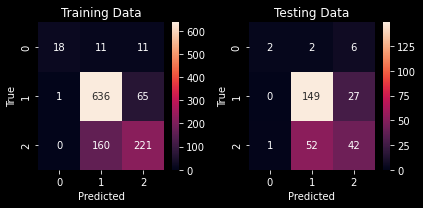

KNeighborsClassifier()
                    precision    recall  f1-score   support

         Irregular       0.50      0.20      0.29        10
           Regular       0.71      0.87      0.78       176
Slightly irregular       0.55      0.35      0.43        95

          accuracy                           0.67       281
         macro avg       0.59      0.47      0.50       281
      weighted avg       0.65      0.67      0.64       281



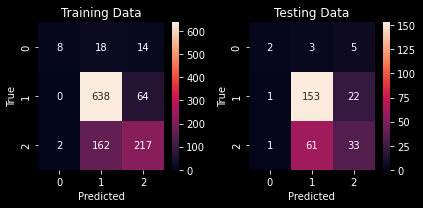

KNeighborsClassifier(n_neighbors=10)
                    precision    recall  f1-score   support

         Irregular       1.00      0.10      0.18        10
           Regular       0.68      0.92      0.78       176
Slightly irregular       0.55      0.24      0.34        95

          accuracy                           0.66       281
         macro avg       0.74      0.42      0.43       281
      weighted avg       0.65      0.66      0.61       281



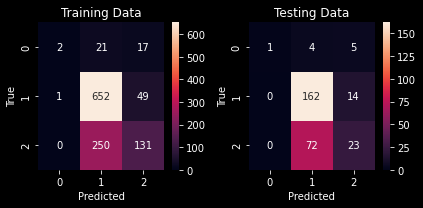

KNeighborsClassifier(n_neighbors=50)
                    precision    recall  f1-score   support

         Irregular       0.00      0.00      0.00        10
           Regular       0.70      0.95      0.80       176
Slightly irregular       0.66      0.28      0.40        95

          accuracy                           0.69       281
         macro avg       0.45      0.41      0.40       281
      weighted avg       0.66      0.69      0.64       281



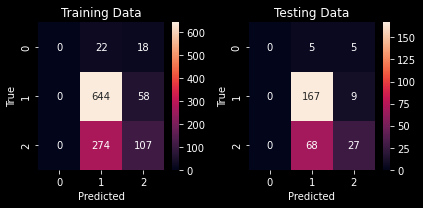

RandomForestClassifier(max_leaf_nodes=3)
                    precision    recall  f1-score   support

         Irregular       0.00      0.00      0.00        10
           Regular       0.64      1.00      0.78       176
Slightly irregular       0.67      0.04      0.08        95

          accuracy                           0.64       281
         macro avg       0.44      0.35      0.29       281
      weighted avg       0.63      0.64      0.52       281



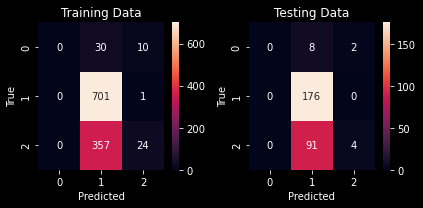

RandomForestClassifier(max_leaf_nodes=10)
                    precision    recall  f1-score   support

         Irregular       0.00      0.00      0.00        10
           Regular       0.70      0.93      0.80       176
Slightly irregular       0.60      0.31      0.41        95

          accuracy                           0.68       281
         macro avg       0.43      0.41      0.40       281
      weighted avg       0.64      0.68      0.64       281



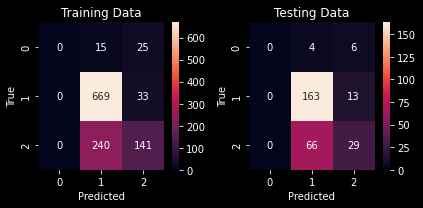

RandomForestClassifier(max_leaf_nodes=30)
                    precision    recall  f1-score   support

         Irregular       0.00      0.00      0.00        10
           Regular       0.72      0.93      0.81       176
Slightly irregular       0.64      0.38      0.48        95

          accuracy                           0.71       281
         macro avg       0.46      0.44      0.43       281
      weighted avg       0.67      0.71      0.67       281



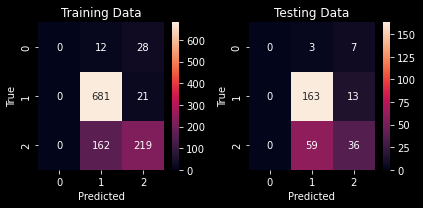

GradientBoostingClassifier(max_leaf_nodes=3)
                    precision    recall  f1-score   support

         Irregular       0.67      0.20      0.31        10
           Regular       0.75      0.89      0.82       176
Slightly irregular       0.64      0.46      0.54        95

          accuracy                           0.72       281
         macro avg       0.69      0.52      0.55       281
      weighted avg       0.71      0.72      0.70       281



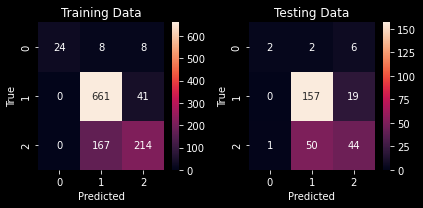

GradientBoostingClassifier(max_leaf_nodes=10)
                    precision    recall  f1-score   support

         Irregular       0.50      0.20      0.29        10
           Regular       0.74      0.86      0.80       176
Slightly irregular       0.56      0.42      0.48        95

          accuracy                           0.69       281
         macro avg       0.60      0.49      0.52       281
      weighted avg       0.67      0.69      0.67       281



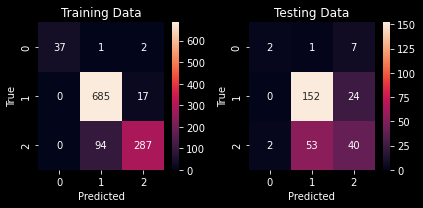

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

for m in models:
    m.fit(X_train, y_train)
    y_train_pred = m.predict(X_train)
    y_test_pred = m.predict(X_test)
    
    print(m)
    print(classification_report(y_test, y_test_pred))

    # Compute confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    conf_matrix_train = conf_matrix_train
    conf_matrix_test  = conf_matrix_test
    
    # Create subplots for side-by-side visualization
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
    
    # Plot confusion matrix for training data
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    # Plot confusion matrix for test data
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")
    
    # Show the plots
    plt.tight_layout()
    plt.show()
# end

## Parsimony (remove excess features)

In [28]:
# Fit a Random Forest model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=10)
gb.fit(X, y)

# Get feature importances
importances = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)
importances = importances[:100]

features_gb = importances.index

X_pars = X[ features_gb ]
importances

Lot Area                                                                                                     0.177419
Lot Config_Cul-de-sac                                                                                        0.149595
Lot Frontage                                                                                                 0.099899
Sale Price                                                                                                   0.088518
Nbhd_Gilbert                                                                                                 0.056372
Year                                                                                                         0.049539
Indoor Area                                                                                                  0.031596
Outdoor Area                                                                                                 0.031302
Year Remod Add                                          

### Variance Inflation Factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_pars_with_const = sm.add_constant(X_pars)

vif = pd.Series(
    [variance_inflation_factor(X_pars_with_const.values, i) for i in range(X_pars_with_const.shape[1])],
    index=X_pars_with_const.columns
).sort_values(ascending=False)

vif[:10]

const                        23.979280
House Style_2 story          12.733669
Floors                       12.305920
Year                         10.130746
Type_2-STORY 1946 & NEWER     7.434052
Sale Price                    7.380467
Indoor Area                   6.062499
Nbhd_Somerset                 5.579852
Overall Qual                  4.810204
Basement Height               4.801304
dtype: float64

In [30]:
# Copy dataset to avoid modifying the original
X_vif = X_pars.copy()

# Iteratively remove features with high VIF
while True:
    # Add constant for intercept
    X_vif_with_const = sm.add_constant(X_vif)
    
    # Compute VIF for all features
    vif_series = pd.Series(
        [variance_inflation_factor(X_vif_with_const.values, i) for i in range(X_vif_with_const.shape[1])],
        index=X_vif_with_const.columns
    )
    
    # Exclude constant term and get the feature with the highest VIF
    vif_series = vif_series.drop('const', errors='ignore')
    highest_vif_feature = vif_series.idxmax()
    #display(vif_series)
    
    # Break the loop if all features have VIF ≤ 10
    if vif_series.loc[highest_vif_feature] <= 10:  # Checking the first feature after 'const'
        break

    # Drop the feature with the highest VIF
    X_vif = X_vif.drop(columns=[highest_vif_feature])

    print(f"Dropped: {highest_vif_feature} (VIF={vif_series.loc[highest_vif_feature]:.2f})")
# end

vif_series.sort_values(ascending=False)[:10]

Dropped: House Style_2 story (VIF=12.73)
Dropped: Year (VIF=10.05)


Sale Price                             7.370420
Floors                                 6.690480
Indoor Area                            6.053641
Nbhd_Somerset                          5.464697
Type_2-STORY 1946 & NEWER              5.118872
Overall Qual                           4.740099
Zoning Class_Floating Village Resid    4.585638
Total Rooms Above Grade                4.560500
Basement Height                        4.560449
Year Garage                            4.269767
dtype: float64

### Re-fit models

LogisticRegression()
                    precision    recall  f1-score   support

         Irregular       0.67      0.20      0.31        10
           Regular       0.73      0.85      0.79       176
Slightly irregular       0.56      0.44      0.49        95

          accuracy                           0.69       281
         macro avg       0.65      0.50      0.53       281
      weighted avg       0.67      0.69      0.67       281



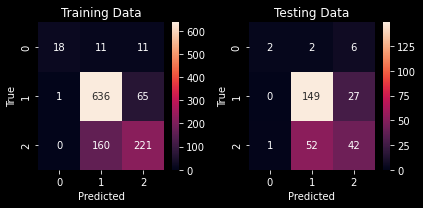

KNeighborsClassifier()
                    precision    recall  f1-score   support

         Irregular       0.50      0.20      0.29        10
           Regular       0.71      0.87      0.78       176
Slightly irregular       0.55      0.35      0.43        95

          accuracy                           0.67       281
         macro avg       0.59      0.47      0.50       281
      weighted avg       0.65      0.67      0.64       281



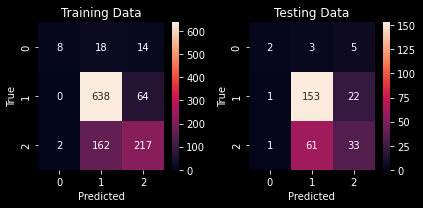

KNeighborsClassifier(n_neighbors=10)
                    precision    recall  f1-score   support

         Irregular       1.00      0.10      0.18        10
           Regular       0.68      0.92      0.78       176
Slightly irregular       0.55      0.24      0.34        95

          accuracy                           0.66       281
         macro avg       0.74      0.42      0.43       281
      weighted avg       0.65      0.66      0.61       281



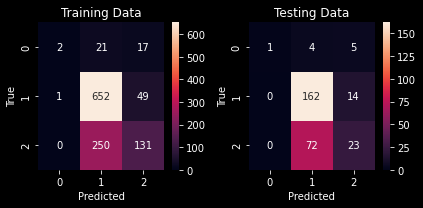

KNeighborsClassifier(n_neighbors=50)
                    precision    recall  f1-score   support

         Irregular       0.00      0.00      0.00        10
           Regular       0.70      0.95      0.80       176
Slightly irregular       0.66      0.28      0.40        95

          accuracy                           0.69       281
         macro avg       0.45      0.41      0.40       281
      weighted avg       0.66      0.69      0.64       281



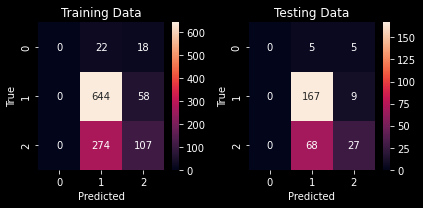

RandomForestClassifier(max_leaf_nodes=3)
                    precision    recall  f1-score   support

         Irregular       0.00      0.00      0.00        10
           Regular       0.63      1.00      0.77       176
Slightly irregular       1.00      0.01      0.02        95

          accuracy                           0.63       281
         macro avg       0.54      0.34      0.26       281
      weighted avg       0.73      0.63      0.49       281



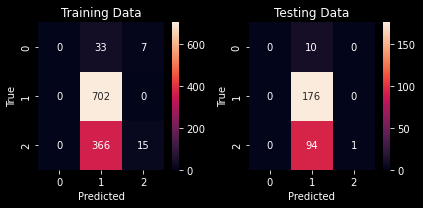

RandomForestClassifier(max_leaf_nodes=10)
                    precision    recall  f1-score   support

         Irregular       0.00      0.00      0.00        10
           Regular       0.70      0.91      0.79       176
Slightly irregular       0.57      0.31      0.40        95

          accuracy                           0.67       281
         macro avg       0.42      0.40      0.40       281
      weighted avg       0.63      0.67      0.63       281



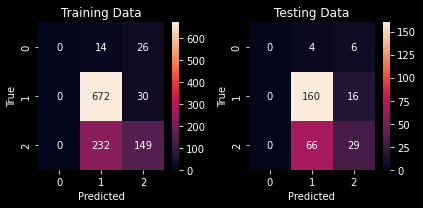

RandomForestClassifier(max_leaf_nodes=30)
                    precision    recall  f1-score   support

         Irregular       0.00      0.00      0.00        10
           Regular       0.71      0.94      0.81       176
Slightly irregular       0.67      0.35      0.46        95

          accuracy                           0.70       281
         macro avg       0.46      0.43      0.42       281
      weighted avg       0.67      0.70      0.66       281



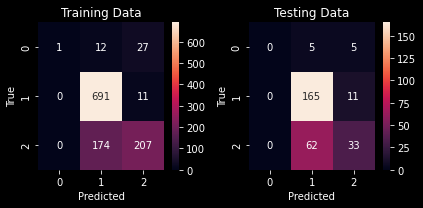

GradientBoostingClassifier(max_leaf_nodes=3)
                    precision    recall  f1-score   support

         Irregular       0.67      0.20      0.31        10
           Regular       0.75      0.89      0.82       176
Slightly irregular       0.64      0.46      0.54        95

          accuracy                           0.72       281
         macro avg       0.69      0.52      0.55       281
      weighted avg       0.71      0.72      0.70       281



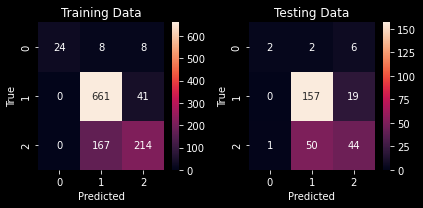

GradientBoostingClassifier(max_leaf_nodes=10)
                    precision    recall  f1-score   support

         Irregular       0.50      0.20      0.29        10
           Regular       0.74      0.86      0.80       176
Slightly irregular       0.56      0.42      0.48        95

          accuracy                           0.69       281
         macro avg       0.60      0.49      0.52       281
      weighted avg       0.67      0.69      0.67       281



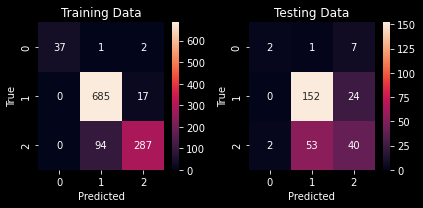

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

for m in models:
    m.fit(X_train, y_train)
    y_train_pred = m.predict(X_train)
    y_test_pred = m.predict(X_test)
    
    print(m)
    print(classification_report(y_test, y_test_pred))

    # Compute confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    conf_matrix_train = conf_matrix_train.astype(int)
    conf_matrix_test  = conf_matrix_test.astype(int)
    
    # Create subplots for side-by-side visualization
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
    
    # Plot confusion matrix for training data
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    # Plot confusion matrix for test data
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")
    
    # Show the plots
    plt.tight_layout()
    plt.show()
# end

# GridSearchCV over Dirichlet class weights

In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test  = encoder.transform(y_test)

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

dirichlet_samples = [dict(enumerate(weights)) for weights in np.random.dirichlet(alpha=np.ones(df[label].nunique()), size=100)]

# Define StratifiedKFold for balanced class distribution
kf = StratifiedKFold(n_splits=5, shuffle=True)

# Define the parameter grid
param_grid = {'class_weight': dirichlet_samples}

# Define the Logistic Regression model
model = LogisticRegression()

# Perform GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='f1_macro')
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'class_weight': {0: 0.5300390385460103,
  1: 0.2457488574633294,
  2: 0.22421210399066036}}

                    precision    recall  f1-score   support

         Irregular       0.60      0.30      0.40        10
           Regular       0.72      0.90      0.80       176
Slightly irregular       0.60      0.37      0.46        95

          accuracy                           0.70       281
         macro avg       0.64      0.52      0.55       281
      weighted avg       0.68      0.70      0.67       281



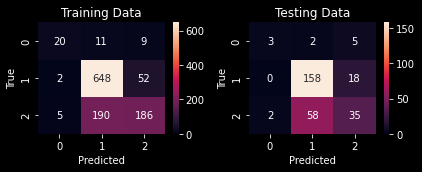

In [34]:
#########################
### CHECK PERFORMANCE ###
#########################
model = grid_search.best_estimator_

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train = encoder.inverse_transform(y_train)
y_test  = encoder.inverse_transform(y_test)
y_train_pred = encoder.inverse_transform(y_train_pred)
y_test_pred  = encoder.inverse_transform(y_test_pred)

print(classification_report(y_test, y_test_pred))

conf_matrix_train = confusion_matrix(y_train, y_train_pred).astype(int)
conf_matrix_test = confusion_matrix(y_test, y_test_pred).astype(int)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

plt.tight_layout()
plt.show()